# Preprocessing the Data

In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

Gengerating the Data

In [3]:
for i in range(5000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0) 
    
for i in range(100000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)   

In [4]:
# print a sample from raw samples
[print(i) for i in train_samples[:10]]

59
65
13
72
33
96
48
82
34
72


[None, None, None, None, None, None, None, None, None, None]

In [5]:
# print a sample from raw labels
[print(i) for i in train_labels[:10]]

1
0
1
0
1
0
1
0
1
0


[None, None, None, None, None, None, None, None, None, None]

In [6]:
# converting to numpy array
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [7]:
# scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
# print a sample from scaled samples
[print(i) for i in scaled_train_samples[:10]]

[0.52873563]
[0.59770115]
[0.]
[0.67816092]
[0.22988506]
[0.95402299]
[0.40229885]
[0.79310345]
[0.24137931]
[0.67816092]


[None, None, None, None, None, None, None, None, None, None]

# Training the Network

In [9]:
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import sparse_categorical_crossentropy

E:\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [10]:
model = Sequential([
    Dense(16, input_shape=(scaled_train_samples.shape[1:]), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')    
])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Training the Net

In [12]:
model.compile(Adam(lr=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=32, epochs=5, shuffle=True, verbose=2)

Train on 189000 samples, validate on 21000 samples
Epoch 1/5
 - 22s - loss: 0.2510 - acc: 0.9354 - val_loss: 0.0755 - val_acc: 1.0000
Epoch 2/5
 - 19s - loss: 0.2163 - acc: 0.9447 - val_loss: 0.0668 - val_acc: 1.0000
Epoch 3/5
 - 19s - loss: 0.2123 - acc: 0.9459 - val_loss: 0.0678 - val_acc: 1.0000
Epoch 4/5
 - 19s - loss: 0.2108 - acc: 0.9462 - val_loss: 0.0551 - val_acc: 1.0000
Epoch 5/5
 - 19s - loss: 0.2099 - acc: 0.9465 - val_loss: 0.0567 - val_acc: 1.0000


# Preprocess Test Data

In [14]:
test_labels = []
test_samples = []

In [15]:
for i in range(1000):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0) 
    
for i in range(20000):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)   

In [16]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Predict

In [18]:
prediction = model.predict(scaled_test_samples, batch_size=32, verbose=0)

In [19]:
# printing a sample of the predictions
[print(i) for i in prediction[:10]]

[0.9288964  0.07110362]
[0.03336461 0.9666354 ]
[0.928357   0.07164294]
[0.03170623 0.9682938 ]
[0.92858464 0.07141541]
[0.03642073 0.9635793 ]
[0.92883986 0.0711602 ]
[0.04007175 0.9599283 ]
[0.9284425  0.07155755]
[0.03064523 0.96935475]


[None, None, None, None, None, None, None, None, None, None]

In [20]:
class_prediction = model.predict_classes(scaled_test_samples, batch_size=32, verbose=0)

In [21]:
[print(i) for i in class_prediction[:10]]

0
1
0
1
0
1
0
1
0
1


[None, None, None, None, None, None, None, None, None, None]

# Confusing Matrix

In [22]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [23]:
cm = confusion_matrix(test_labels, class_prediction)

In [24]:
# taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[20000  1000]
 [ 1000 20000]]


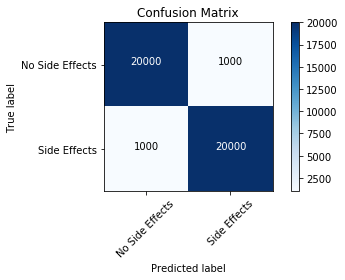

In [26]:
cm_class_labels = ['No Side Effects', 'Side Effects']
plot_confusion_matrix(cm, cm_class_labels, title='Confusion Matrix')